# Importing and Test creation

`Note: We split it early on as we have isOpen which is a column directly related to our future target column`

*   We will first import libraries
*   Import and load the given dataset
*   Seperate into main-test and main-train
*   We can keep on adding libraries to the first cell as we need them.





In [ ]:
import pandas as pd
import numpy as np
# import sklearn 

from sklearn.linear_model import LinearRegression
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/highRadData/H2HBABBA2528.csv'
in_df = pd.read_csv(path)
in_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-02 00:00:00,2019.0,1.930170e+09,2019-11-21,20191119,20191121,20191206.0,USD,RV,1.0,NaN,29891.83,20191121.0,NAH4,1.930170e+09,0
1,U001,0200723794,MID MO foundation,2019-11-29 00:00:00,2019.0,1.930152e+09,2019-11-14,20191113,20191114,20191129.0,USD,RV,1.0,NaN,155913.13,20191114.0,NAA8,1.930152e+09,0
2,U001,0200078795,H T H us,NaN,2020.0,1.930612e+09,2020-03-06,20200306,20200306,20200321.0,USD,RV,1.0,NaN,8831.49,20200306.0,NAA8,1.930612e+09,1
3,U001,0200799367,MCL us,2019-10-21 00:00:00,2019.0,1.929943e+09,2019-10-04,20190930,20191004,20191019.0,USD,RV,1.0,NaN,5193.20,20191004.0,NAA8,1.929943e+09,0
4,U001,0200762301,C&S WH in,2019-09-20 00:00:00,2019.0,1.929828e+09,2019-09-05,20190904,20190905,20190920.0,USD,RV,1.0,NaN,2465.59,20190905.0,NAC6,1.929828e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0100049617,SUNRIS corporation,NaN,2020.0,1.930679e+09,2020-03-20,20200320,20200320,20200409.0,USD,RV,1.0,NaN,35373.21,20200320.0,NAD1,1.930679e+09,1
49996,U001,0200769623,WAL-MAR,NaN,2020.0,1.930783e+09,2020-04-16,20200414,20200416,20200501.0,USD,RV,1.0,NaN,12869.58,20200416.0,NAH4,1.930783e+09,1
49997,U001,0200706844,WINC systems,2019-02-07 00:00:00,2019.0,1.928671e+09,2019-01-23,20190123,20190123,20190207.0,USD,RV,1.0,NaN,26097.80,20190123.0,NAA8,1.928671e+09,0
49998,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930801e+09,2020-04-20,20200419,20200420,20200505.0,USD,RV,1.0,NaN,29172.69,20200420.0,NAH4,1.930801e+09,1


In [ ]:
in_df.shape[0]
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# Removal of Duplicate Rows and null constants
* We can remove the duplicate rows before splitting so that we don't need pre processing for test set again.
* Same goes for Columns having all null values

In [ ]:
in_df.drop_duplicates(keep="first", inplace=True)
in_df.reset_index(inplace=True, drop=True)
# tr = in_df.T
# tr.drop_duplicates(keep="first", inplace=True)
# in_df = tr.reset_index()
# in_df=tr.T
# in_df.drop(columns=['index'], axis=1, inplace=True)
in_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-02 00:00:00,2019.0,1.930170e+09,2019-11-21,20191119,20191121,20191206.0,USD,RV,1.0,NaN,29891.83,20191121.0,NAH4,1.930170e+09,0
1,U001,0200723794,MID MO foundation,2019-11-29 00:00:00,2019.0,1.930152e+09,2019-11-14,20191113,20191114,20191129.0,USD,RV,1.0,NaN,155913.13,20191114.0,NAA8,1.930152e+09,0
2,U001,0200078795,H T H us,NaN,2020.0,1.930612e+09,2020-03-06,20200306,20200306,20200321.0,USD,RV,1.0,NaN,8831.49,20200306.0,NAA8,1.930612e+09,1
3,U001,0200799367,MCL us,2019-10-21 00:00:00,2019.0,1.929943e+09,2019-10-04,20190930,20191004,20191019.0,USD,RV,1.0,NaN,5193.20,20191004.0,NAA8,1.929943e+09,0
4,U001,0200762301,C&S WH in,2019-09-20 00:00:00,2019.0,1.929828e+09,2019-09-05,20190904,20190905,20190920.0,USD,RV,1.0,NaN,2465.59,20190905.0,NAC6,1.929828e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,U001,0100049617,SUNRIS corporation,NaN,2020.0,1.930679e+09,2020-03-20,20200320,20200320,20200409.0,USD,RV,1.0,NaN,35373.21,20200320.0,NAD1,1.930679e+09,1
48837,U001,0200769623,WAL-MAR,NaN,2020.0,1.930783e+09,2020-04-16,20200414,20200416,20200501.0,USD,RV,1.0,NaN,12869.58,20200416.0,NAH4,1.930783e+09,1
48838,U001,0200706844,WINC systems,2019-02-07 00:00:00,2019.0,1.928671e+09,2019-01-23,20190123,20190123,20190207.0,USD,RV,1.0,NaN,26097.80,20190123.0,NAA8,1.928671e+09,0
48839,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930801e+09,2020-04-20,20200419,20200420,20200505.0,USD,RV,1.0,NaN,29172.69,20200420.0,NAH4,1.930801e+09,1


In [ ]:
for col in in_df.columns:
  if(len(in_df[col]) == in_df[col].isnull().sum()):
    in_df.drop([col], axis=1, inplace=True)

in_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-02 00:00:00,2019.0,1.930170e+09,2019-11-21,20191119,20191121,20191206.0,USD,RV,1.0,29891.83,20191121.0,NAH4,1.930170e+09,0
1,U001,0200723794,MID MO foundation,2019-11-29 00:00:00,2019.0,1.930152e+09,2019-11-14,20191113,20191114,20191129.0,USD,RV,1.0,155913.13,20191114.0,NAA8,1.930152e+09,0
2,U001,0200078795,H T H us,NaN,2020.0,1.930612e+09,2020-03-06,20200306,20200306,20200321.0,USD,RV,1.0,8831.49,20200306.0,NAA8,1.930612e+09,1
3,U001,0200799367,MCL us,2019-10-21 00:00:00,2019.0,1.929943e+09,2019-10-04,20190930,20191004,20191019.0,USD,RV,1.0,5193.20,20191004.0,NAA8,1.929943e+09,0
4,U001,0200762301,C&S WH in,2019-09-20 00:00:00,2019.0,1.929828e+09,2019-09-05,20190904,20190905,20190920.0,USD,RV,1.0,2465.59,20190905.0,NAC6,1.929828e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,U001,0100049617,SUNRIS corporation,NaN,2020.0,1.930679e+09,2020-03-20,20200320,20200320,20200409.0,USD,RV,1.0,35373.21,20200320.0,NAD1,1.930679e+09,1
48837,U001,0200769623,WAL-MAR,NaN,2020.0,1.930783e+09,2020-04-16,20200414,20200416,20200501.0,USD,RV,1.0,12869.58,20200416.0,NAH4,1.930783e+09,1
48838,U001,0200706844,WINC systems,2019-02-07 00:00:00,2019.0,1.928671e+09,2019-01-23,20190123,20190123,20190207.0,USD,RV,1.0,26097.80,20190123.0,NAA8,1.928671e+09,0
48839,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930801e+09,2020-04-20,20200419,20200420,20200505.0,USD,RV,1.0,29172.69,20200420.0,NAH4,1.930801e+09,1


In [ ]:
for col in in_df.columns:
  if(1 == len(in_df[col].unique())):
    in_df.drop([col], axis=1, inplace=True)

in_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-02 00:00:00,2019.0,1.930170e+09,2019-11-21,20191119,20191121,20191206.0,USD,RV,29891.83,20191121.0,NAH4,1.930170e+09,0
1,U001,0200723794,MID MO foundation,2019-11-29 00:00:00,2019.0,1.930152e+09,2019-11-14,20191113,20191114,20191129.0,USD,RV,155913.13,20191114.0,NAA8,1.930152e+09,0
2,U001,0200078795,H T H us,NaN,2020.0,1.930612e+09,2020-03-06,20200306,20200306,20200321.0,USD,RV,8831.49,20200306.0,NAA8,1.930612e+09,1
3,U001,0200799367,MCL us,2019-10-21 00:00:00,2019.0,1.929943e+09,2019-10-04,20190930,20191004,20191019.0,USD,RV,5193.20,20191004.0,NAA8,1.929943e+09,0
4,U001,0200762301,C&S WH in,2019-09-20 00:00:00,2019.0,1.929828e+09,2019-09-05,20190904,20190905,20190920.0,USD,RV,2465.59,20190905.0,NAC6,1.929828e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,U001,0100049617,SUNRIS corporation,NaN,2020.0,1.930679e+09,2020-03-20,20200320,20200320,20200409.0,USD,RV,35373.21,20200320.0,NAD1,1.930679e+09,1
48837,U001,0200769623,WAL-MAR,NaN,2020.0,1.930783e+09,2020-04-16,20200414,20200416,20200501.0,USD,RV,12869.58,20200416.0,NAH4,1.930783e+09,1
48838,U001,0200706844,WINC systems,2019-02-07 00:00:00,2019.0,1.928671e+09,2019-01-23,20190123,20190123,20190207.0,USD,RV,26097.80,20190123.0,NAA8,1.928671e+09,0
48839,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930801e+09,2020-04-20,20200419,20200420,20200505.0,USD,RV,29172.69,20200420.0,NAH4,1.930801e+09,1


In [ ]:
in_df.isOpen.unique()

array([0, 1])

# isOpen Inference and Main Splitting
*   So from this we get the inference that isOpen provides us with binary values.
*   As per the Product Requirement we know that if isOpen is 1 it means it hasn't been completd. 
*   Therefore invoices with isOpen should be split into the test dataset and those with isOpen 0 should be put in Training Dataset.

In [ ]:
main_train=in_df[in_df['isOpen'] == 0]
main_test=in_df[in_df['isOpen'] == 1]
main_train.isOpen.unique(), main_test.isOpen.unique()

(array([0]), array([1]))

In [ ]:
main_train.drop(['isOpen'], axis=1, inplace=True)
main_test.drop(['isOpen'], axis=1, inplace=True)
main_test.reset_index(inplace=True, drop=True)
main_train.reset_index(inplace=True, drop=True)
main_test.to_csv('/content/drive/MyDrive/highRadData/main_test.csv')
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR in,2019-12-02 00:00:00,2019.0,1.930170e+09,2019-11-21,20191119,20191121,20191206.0,USD,RV,29891.83,20191121.0,NAH4,1.930170e+09
1,U001,0200723794,MID MO foundation,2019-11-29 00:00:00,2019.0,1.930152e+09,2019-11-14,20191113,20191114,20191129.0,USD,RV,155913.13,20191114.0,NAA8,1.930152e+09
2,U001,0200799367,MCL us,2019-10-21 00:00:00,2019.0,1.929943e+09,2019-10-04,20190930,20191004,20191019.0,USD,RV,5193.20,20191004.0,NAA8,1.929943e+09
3,U001,0200762301,C&S WH in,2019-09-20 00:00:00,2019.0,1.929828e+09,2019-09-05,20190904,20190905,20190920.0,USD,RV,2465.59,20190905.0,NAC6,1.929828e+09
4,U001,0200726979,BJ'S trust,2019-04-30 00:00:00,2019.0,1.929139e+09,2019-04-15,20190412,20190415,20190430.0,USD,RV,62359.91,20190415.0,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39134,CA02,0140105686,SYSC systems,2019-09-12 00:00:00,2019.0,2.960575e+09,2019-08-23,20190823,20190823,20190908.0,CAD,RV,1953.00,20190829.0,CA10,2.960575e+09
39135,U001,0200769623,WAL-MAR systems,2019-11-18 00:00:00,2019.0,1.930095e+09,2019-11-03,20191102,20191103,20191118.0,USD,RV,3853.70,20191103.0,NAH4,1.930095e+09
39136,U001,0200795490,HY - corporation,2020-02-18 00:00:00,2020.0,1.930461e+09,2020-01-30,20200131,20200130,20200214.0,USD,RV,50730.42,20200130.0,NAA8,1.930461e+09
39137,U001,0200706844,WINC systems,2019-02-07 00:00:00,2019.0,1.928671e+09,2019-01-23,20190123,20190123,20190207.0,USD,RV,26097.80,20190123.0,NAA8,1.928671e+09


In [ ]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39139 entries, 0 to 39138
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           39139 non-null  object 
 1   cust_number             39139 non-null  object 
 2   name_customer           39139 non-null  object 
 3   clear_date              39139 non-null  object 
 4   buisness_year           39139 non-null  float64
 5   doc_id                  39139 non-null  float64
 6   posting_date            39139 non-null  object 
 7   document_create_date    39139 non-null  int64  
 8   document_create_date.1  39139 non-null  int64  
 9   due_in_date             39139 non-null  float64
 10  invoice_currency        39139 non-null  object 
 11  document type           39139 non-null  object 
 12  total_open_amount       39139 non-null  float64
 13  baseline_create_date    39139 non-null  float64
 14  cust_payment_terms      39139 non-null

#Target Column Creation

*  now we need to convert all date colmns from object to Datetime
*  Then Create Target column as delay. This is the difference between the Clear date and the due in date
*  Then go ahead with splitting into test and train.

`Note: We are creating the target column before as to put the column in both train and test and reduce lines of code`

### Date Time Conversion

In [ ]:
import datetime
date_cols = ['clear_date', 'posting_date', 'document_create_date', 'document_create_date.1', 'due_in_date']
main_train['due_in_date'] = main_train['due_in_date'].astype(int)
for datcol in date_cols:
  main_train[datcol] = pd.to_datetime(main_train[datcol].astype(str))
# df['clear_date']=pd.to_datetime(df['clear_date'])
# df['posting_date']=pd.to_datetime(df['posting_date'])

# df['document_create_date']=pd.to_datetime(df['document_create_date'].astype(str))
# df
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,1.930170e+09,2019-11-21,2019-11-19,2019-11-21,2019-12-06,USD,RV,29891.83,20191121.0,NAH4,1.930170e+09
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,1.930152e+09,2019-11-14,2019-11-13,2019-11-14,2019-11-29,USD,RV,155913.13,20191114.0,NAA8,1.930152e+09
2,U001,0200799367,MCL us,2019-10-21,2019.0,1.929943e+09,2019-10-04,2019-09-30,2019-10-04,2019-10-19,USD,RV,5193.20,20191004.0,NAA8,1.929943e+09
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,1.929828e+09,2019-09-05,2019-09-04,2019-09-05,2019-09-20,USD,RV,2465.59,20190905.0,NAC6,1.929828e+09
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,1.929139e+09,2019-04-15,2019-04-12,2019-04-15,2019-04-30,USD,RV,62359.91,20190415.0,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39134,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1953.00,20190829.0,CA10,2.960575e+09
39135,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,1.930095e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,USD,RV,3853.70,20191103.0,NAH4,1.930095e+09
39136,U001,0200795490,HY - corporation,2020-02-18,2020.0,1.930461e+09,2020-01-30,2020-01-31,2020-01-30,2020-02-14,USD,RV,50730.42,20200130.0,NAA8,1.930461e+09
39137,U001,0200706844,WINC systems,2019-02-07,2019.0,1.928671e+09,2019-01-23,2019-01-23,2019-01-23,2019-02-07,USD,RV,26097.80,20190123.0,NAA8,1.928671e+09


#  Target Column

*  We will create the delay column, difference in clear_date and due_in_date
*  Convert the time delta to int format

In [ ]:
# for row in main_train:
#    main_train.at[i, 'delay'] = main_train.iloc[i, 9] - main_train.iloc[i, 3] 
# main_train
for i in range(len(main_train)):
   main_train.at[i, 'delay'] = main_train.iloc[i, 9] - main_train.iloc[i, 3] 
main_train['delay'] = main_train['delay'].dt.days.astype(int)
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,1.930170e+09,2019-11-21,2019-11-19,2019-11-21,2019-12-06,USD,RV,29891.83,20191121.0,NAH4,1.930170e+09,4
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,1.930152e+09,2019-11-14,2019-11-13,2019-11-14,2019-11-29,USD,RV,155913.13,20191114.0,NAA8,1.930152e+09,0
2,U001,0200799367,MCL us,2019-10-21,2019.0,1.929943e+09,2019-10-04,2019-09-30,2019-10-04,2019-10-19,USD,RV,5193.20,20191004.0,NAA8,1.929943e+09,-2
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,1.929828e+09,2019-09-05,2019-09-04,2019-09-05,2019-09-20,USD,RV,2465.59,20190905.0,NAC6,1.929828e+09,0
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,1.929139e+09,2019-04-15,2019-04-12,2019-04-15,2019-04-30,USD,RV,62359.91,20190415.0,NAA8,1.929139e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39134,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1953.00,20190829.0,CA10,2.960575e+09,-4
39135,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,1.930095e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,USD,RV,3853.70,20191103.0,NAH4,1.930095e+09,0
39136,U001,0200795490,HY - corporation,2020-02-18,2020.0,1.930461e+09,2020-01-30,2020-01-31,2020-01-30,2020-02-14,USD,RV,50730.42,20200130.0,NAA8,1.930461e+09,-4
39137,U001,0200706844,WINC systems,2019-02-07,2019.0,1.928671e+09,2019-01-23,2019-01-23,2019-01-23,2019-02-07,USD,RV,26097.80,20190123.0,NAA8,1.928671e+09,0


#   Pre-Processing
*  process for null values.

In [ ]:
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                3
delay                     0
dtype: int64

In [ ]:
main_train[main_train['invoice_id'].isnull()]
len(main_train['invoice_id'].unique())

39137

## Inference
Using this statement we get to know that all the values are unique in invoic_id except the three Nan values
It could be a MAR value but because there are only 3 rows with Nan we can remove those rows.

In [ ]:
main_train = main_train[main_train['invoice_id'].isnull() == False]
main_train.reset_index(inplace=True, drop=True)
# main_train.drop(columns=['index', 'level_0'], axis=1, inplace=True)
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
delay                     0
dtype: int64

In [ ]:
# main_train.drop(columns=[col for col in x_train.columns if x_train[col].isnull().sum() == x_train.shape[0]], inplace=True)
main_train.dropna(how='all', axis=0, inplace=True)
main_train.reset_index(inplace=True, drop=True)
# main_train.drop(columns=['index'], axis=1, inplace=True)
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,1.930170e+09,2019-11-21,2019-11-19,2019-11-21,2019-12-06,USD,RV,29891.83,20191121.0,NAH4,1.930170e+09,4
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,1.930152e+09,2019-11-14,2019-11-13,2019-11-14,2019-11-29,USD,RV,155913.13,20191114.0,NAA8,1.930152e+09,0
2,U001,0200799367,MCL us,2019-10-21,2019.0,1.929943e+09,2019-10-04,2019-09-30,2019-10-04,2019-10-19,USD,RV,5193.20,20191004.0,NAA8,1.929943e+09,-2
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,1.929828e+09,2019-09-05,2019-09-04,2019-09-05,2019-09-20,USD,RV,2465.59,20190905.0,NAC6,1.929828e+09,0
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,1.929139e+09,2019-04-15,2019-04-12,2019-04-15,2019-04-30,USD,RV,62359.91,20190415.0,NAA8,1.929139e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39131,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1953.00,20190829.0,CA10,2.960575e+09,-4
39132,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,1.930095e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,USD,RV,3853.70,20191103.0,NAH4,1.930095e+09,0
39133,U001,0200795490,HY - corporation,2020-02-18,2020.0,1.930461e+09,2020-01-30,2020-01-31,2020-01-30,2020-02-14,USD,RV,50730.42,20200130.0,NAA8,1.930461e+09,-4
39134,U001,0200706844,WINC systems,2019-02-07,2019.0,1.928671e+09,2019-01-23,2019-01-23,2019-01-23,2019-02-07,USD,RV,26097.80,20190123.0,NAA8,1.928671e+09,0


Drop all columns having only duplicate values, incase of our datset that's not the case.

In [ ]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39136 entries, 0 to 39135
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39136 non-null  object        
 1   cust_number             39136 non-null  object        
 2   name_customer           39136 non-null  object        
 3   clear_date              39136 non-null  datetime64[ns]
 4   buisness_year           39136 non-null  float64       
 5   doc_id                  39136 non-null  float64       
 6   posting_date            39136 non-null  datetime64[ns]
 7   document_create_date    39136 non-null  datetime64[ns]
 8   document_create_date.1  39136 non-null  datetime64[ns]
 9   due_in_date             39136 non-null  datetime64[ns]
 10  invoice_currency        39136 non-null  object        
 11  document type           39136 non-null  object        
 12  total_open_amount       39136 non-null  float6

*  Now we have 0 nulls in all the columns and hence the data has been pre-processed.

*  We will now go ahead with splitting data into train, validation and test set

In [ ]:
main_train['posting_date'].min(), main_train['posting_date'].max()

(Timestamp('2018-12-30 00:00:00'), Timestamp('2020-02-27 00:00:00'))

In [ ]:
len(main_train[main_train['posting_date'] < pd.to_datetime('20200101')]), len(main_train[main_train['posting_date'] > pd.to_datetime('20200130')])

(34184, 2472)

# Train Validation and Test Set  splitting
According to the previous length calclation the distribution seems to be good enough.
*   We are going to use posting_date range to split the data proportionately
*   We could have sorted but don't need it for this method

In [ ]:
x_train = main_train[main_train['posting_date'] < pd.to_datetime('20200101')].drop('delay', axis=1)
x_train.reset_index(inplace=True, drop=True)
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,1.930170e+09,2019-11-21,2019-11-19,2019-11-21,2019-12-06,USD,RV,29891.83,20191121.0,NAH4,1.930170e+09
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,1.930152e+09,2019-11-14,2019-11-13,2019-11-14,2019-11-29,USD,RV,155913.13,20191114.0,NAA8,1.930152e+09
2,U001,0200799367,MCL us,2019-10-21,2019.0,1.929943e+09,2019-10-04,2019-09-30,2019-10-04,2019-10-19,USD,RV,5193.20,20191004.0,NAA8,1.929943e+09
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,1.929828e+09,2019-09-05,2019-09-04,2019-09-05,2019-09-20,USD,RV,2465.59,20190905.0,NAC6,1.929828e+09
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,1.929139e+09,2019-04-15,2019-04-12,2019-04-15,2019-04-30,USD,RV,62359.91,20190415.0,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,U001,0200739534,OK us,2019-09-27,2019.0,1.929855e+09,2019-09-09,2019-09-10,2019-09-09,2019-09-24,USD,RV,1846.24,20190909.0,NAA8,1.929855e+09
34180,U001,0200956366,RICH foundation,2019-04-19,2019.0,1.929071e+09,2019-04-06,2019-04-02,2019-04-06,2019-04-21,USD,RV,54806.40,20190406.0,NAA8,1.929071e+09
34181,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1953.00,20190829.0,CA10,2.960575e+09
34182,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,1.930095e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,USD,RV,3853.70,20191103.0,NAH4,1.930095e+09


In [ ]:
y_train = main_train[main_train['posting_date'] < pd.to_datetime('20200101')].delay
y_train.reset_index(inplace=True, drop=True)
y_train

0        4
1        0
2       -2
3        0
4        0
        ..
34179   -3
34180    2
34181   -4
34182    0
34183    0
Name: delay, Length: 34184, dtype: int64

In [ ]:
x_testval = main_train[main_train['posting_date'] >= pd.to_datetime('20200101')]
x_testval.reset_index(inplace=True, drop=True)
x_testval

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200707822,PUBLI us,2020-03-05,2020.0,1.930543e+09,2020-02-19,2020-02-19,2020-02-19,2020-03-05,USD,RV,84103.18,20200219.0,NAA8,1.930543e+09,0
1,U001,0200749782,KROG in,2020-03-12,2020.0,1.930572e+09,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,RV,12704.85,20200226.0,NAA8,1.930572e+09,0
2,U001,0200515231,US co,2020-01-22,2020.0,1.930353e+09,2020-01-09,2020-01-04,2020-01-09,2020-01-24,USD,RV,1366.20,20200109.0,NAA8,1.930353e+09,2
3,CA02,0140104440,SO,2020-02-06,2020.0,2.960608e+09,2020-01-19,2020-01-19,2020-01-19,2020-01-31,CAD,RV,358026.58,20200121.0,CA10,2.960608e+09,-6
4,U001,0200726979,BJ'S co,2020-01-21,2020.0,1.930365e+09,2020-01-06,2020-01-07,2020-01-06,2020-01-21,USD,RV,577.57,20200106.0,NAA8,1.930365e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,U001,0200915438,GROC corp,2020-02-18,2020.0,1.930470e+09,2020-02-03,2020-02-02,2020-02-03,2020-02-18,USD,RV,28770.63,20200203.0,NAA8,1.930470e+09,0
4948,U001,0200769623,WAL-MAR trust,2020-02-18,2020.0,1.930470e+09,2020-02-05,2020-02-03,2020-02-05,2020-02-20,USD,RV,15033.89,20200205.0,NAH4,1.930470e+09,2
4949,U001,0200759878,SA us,2020-02-04,2020.0,1.930397e+09,2020-01-18,2020-01-15,2020-01-18,2020-02-02,USD,RV,14013.30,20200118.0,NAH4,1.930397e+09,-2
4950,U001,0200795490,HY - corporation,2020-02-18,2020.0,1.930461e+09,2020-01-30,2020-01-31,2020-01-30,2020-02-14,USD,RV,50730.42,20200130.0,NAA8,1.930461e+09,-4


In [ ]:
x_val = x_testval[x_testval['posting_date'] < pd.to_datetime('20200130')].drop('delay', axis=1)
x_val.reset_index(inplace=True, drop=True)
y_val = x_testval[x_testval['posting_date'] < pd.to_datetime('20200130')].delay
y_val.reset_index(inplace=True, drop=True)
x_val

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200515231,US co,2020-01-22,2020.0,1.930353e+09,2020-01-09,2020-01-04,2020-01-09,2020-01-24,USD,RV,1366.20,20200109.0,NAA8,1.930353e+09
1,CA02,0140104440,SO,2020-02-06,2020.0,2.960608e+09,2020-01-19,2020-01-19,2020-01-19,2020-01-31,CAD,RV,358026.58,20200121.0,CA10,2.960608e+09
2,U001,0200726979,BJ'S co,2020-01-21,2020.0,1.930365e+09,2020-01-06,2020-01-07,2020-01-06,2020-01-21,USD,RV,577.57,20200106.0,NAA8,1.930365e+09
3,CA02,0140104331,CORE-M llc,2020-01-17,2020.0,2.960605e+09,2020-01-08,2020-01-08,2020-01-08,2020-01-20,CAD,RV,3232.00,20200110.0,CA10,2.960605e+09
4,U001,0200769623,WAL-MAR us,2020-01-21,2020.0,1.930379e+09,2020-01-11,2020-01-09,2020-01-11,2020-01-26,USD,RV,67790.25,20200111.0,NAH4,1.930379e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,U001,0200782669,SYGMA in,2020-02-03,2020.0,1.930410e+09,2020-01-17,2020-01-17,2020-01-17,2020-02-01,USD,RV,10455.33,20200117.0,NAA8,1.930410e+09
2383,U001,0200794332,COST associates,2020-02-05,2020.0,1.930431e+09,2020-01-23,2020-01-23,2020-01-23,2020-02-07,USD,RV,3875.45,20200123.0,NAAX,1.930431e+09
2384,U001,0200769623,WAL-MAR,2020-01-15,2020.0,1.930350e+09,2020-01-05,2020-01-03,2020-01-05,2020-01-20,USD,RV,30114.30,20200105.0,NAH4,1.930350e+09
2385,U001,0200769556,SHAM trust,2020-02-10,2020.0,1.930415e+09,2020-01-22,2020-01-20,2020-01-22,2020-02-06,USD,RV,16952.91,20200122.0,NAA8,1.930415e+09


In [ ]:
x_test = x_testval[x_testval['posting_date'] > pd.to_datetime('20200130')].drop('delay', axis=1)
x_test.reset_index(inplace=True, drop=True)
y_test = x_testval[x_testval['posting_date'] > pd.to_datetime('20200130')].delay
y_test.reset_index(inplace=True, drop=True)
y_test

0        0
1        0
2       -1
3        0
4      -17
        ..
2467     4
2468    -7
2469     0
2470     2
2471    -2
Name: delay, Length: 2472, dtype: int64

# EDA
*  plot a histogram for the delay column
*  We will try scatter plots for all the columns against Target column Delay

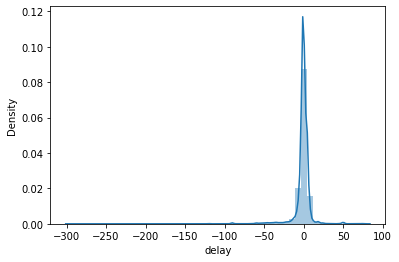

In [ ]:
sns.distplot(y_train)

## It is left or negatively skewed

* Now we need to normalise the data
* Find scatter plots of delay against various values to do feature engineering
* Find Outliers and engineer on them

In [ ]:
y_train.skew()

-4.879123708230554

In [ ]:
trest = y_train + 297
trest
log_transformed = np.log1p(trest)
# log_transformed
log_transformed.skew()

-42.31958974129395

## Log transformation has increased the absolute skewness
We can try square root method

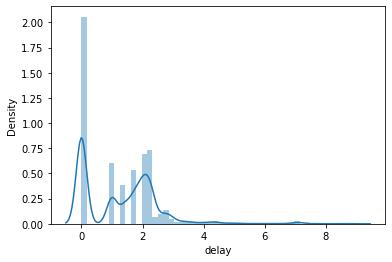

In [ ]:
sqrt_transformed = np.sqrt(y_train)
sqrt_transformed.skew()
sns.distplot(sqrt_transformed)

Therefore we will stick to avoiding normalisation and try to make the data better in the outlier removal section

###  Baseline_Create_date

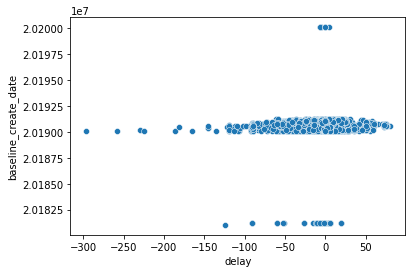

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="baseline_create_date")

* Based on scatter plot we can see that there is no variation in delay with regards to baseline_create_date
* Therefore we can drop the column

In [ ]:
x_train.drop('baseline_create_date', axis=1, inplace=True)
x_val.drop('baseline_create_date', axis=1, inplace=True)
x_test.drop('baseline_create_date', axis=1, inplace=True)
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,1.930170e+09,2019-11-21,2019-11-19,2019-11-21,2019-12-06,USD,RV,29891.83,NAH4,1.930170e+09
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,1.930152e+09,2019-11-14,2019-11-13,2019-11-14,2019-11-29,USD,RV,155913.13,NAA8,1.930152e+09
2,U001,0200799367,MCL us,2019-10-21,2019.0,1.929943e+09,2019-10-04,2019-09-30,2019-10-04,2019-10-19,USD,RV,5193.20,NAA8,1.929943e+09
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,1.929828e+09,2019-09-05,2019-09-04,2019-09-05,2019-09-20,USD,RV,2465.59,NAC6,1.929828e+09
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,1.929139e+09,2019-04-15,2019-04-12,2019-04-15,2019-04-30,USD,RV,62359.91,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,U001,0200739534,OK us,2019-09-27,2019.0,1.929855e+09,2019-09-09,2019-09-10,2019-09-09,2019-09-24,USD,RV,1846.24,NAA8,1.929855e+09
34180,U001,0200956366,RICH foundation,2019-04-19,2019.0,1.929071e+09,2019-04-06,2019-04-02,2019-04-06,2019-04-21,USD,RV,54806.40,NAA8,1.929071e+09
34181,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1953.00,CA10,2.960575e+09
34182,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,1.930095e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,USD,RV,3853.70,NAH4,1.930095e+09


### document type

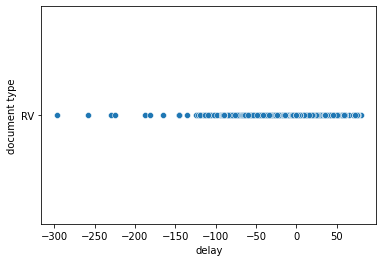

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="document type")

* drop the column as there is constant value

In [ ]:
x_train.drop('document type', axis=1, inplace=True)
x_val.drop('document type', axis=1, inplace=True)
x_test.drop('document type', axis=1, inplace=True)
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,1.930170e+09,2019-11-21,2019-11-19,2019-11-21,2019-12-06,USD,29891.83,NAH4,1.930170e+09
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,1.930152e+09,2019-11-14,2019-11-13,2019-11-14,2019-11-29,USD,155913.13,NAA8,1.930152e+09
2,U001,0200799367,MCL us,2019-10-21,2019.0,1.929943e+09,2019-10-04,2019-09-30,2019-10-04,2019-10-19,USD,5193.20,NAA8,1.929943e+09
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,1.929828e+09,2019-09-05,2019-09-04,2019-09-05,2019-09-20,USD,2465.59,NAC6,1.929828e+09
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,1.929139e+09,2019-04-15,2019-04-12,2019-04-15,2019-04-30,USD,62359.91,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,U001,0200739534,OK us,2019-09-27,2019.0,1.929855e+09,2019-09-09,2019-09-10,2019-09-09,2019-09-24,USD,1846.24,NAA8,1.929855e+09
34180,U001,0200956366,RICH foundation,2019-04-19,2019.0,1.929071e+09,2019-04-06,2019-04-02,2019-04-06,2019-04-21,USD,54806.40,NAA8,1.929071e+09
34181,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,1953.00,CA10,2.960575e+09
34182,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,1.930095e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,USD,3853.70,NAH4,1.930095e+09


### business_year

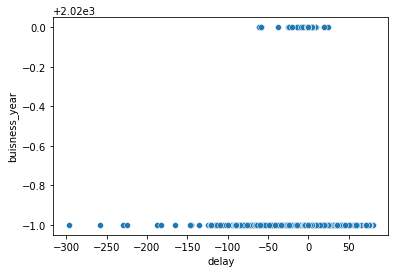

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="buisness_year")

### total_open_amount

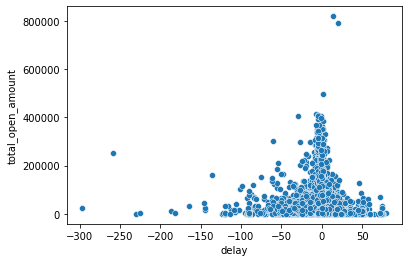

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="total_open_amount")

### business_code

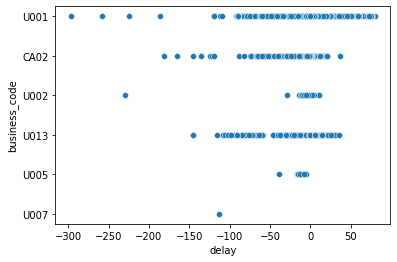

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="business_code")

### cust_number

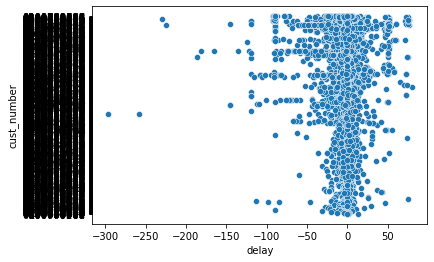

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="cust_number")

###  cust_payment_terms

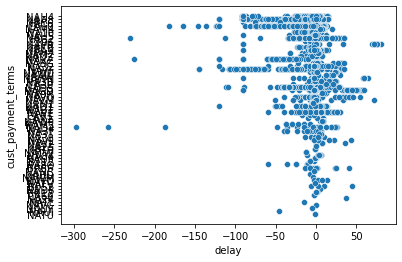

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="cust_payment_terms")

### invoice_id

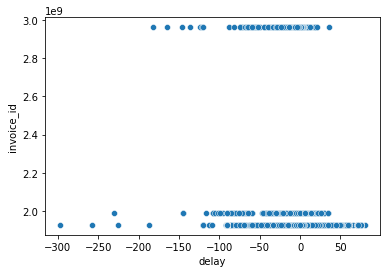

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="invoice_id")

### doc_id

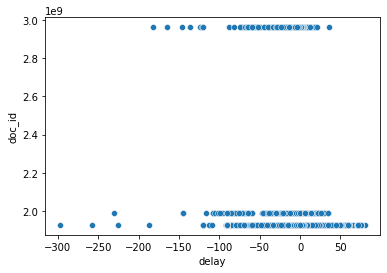

In [ ]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="doc_id")

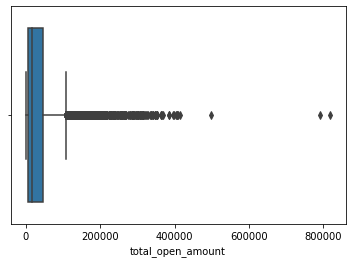

In [ ]:
sns.boxplot(x=x_train.total_open_amount)

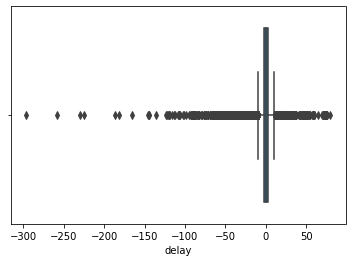

In [ ]:
sns.boxplot(x=y_train)

In [ ]:
x_train.describe()

,buisness_year,doc_id,total_open_amount,invoice_id
count,34184.000000,3.418400e+04,34184.000000,3.418400e+04
mean,2019.005734,2.012928e+09,31696.357023,2.012928e+09
std,0.075505,2.795664e+08,39276.580811,2.795664e+08
min,2019.000000,1.928502e+09,0.430000,1.928502e+09
25%,2019.000000,1.929091e+09,4556.572500,1.929091e+09
50%,2019.000000,1.929608e+09,17036.485000,1.929608e+09
75%,2019.000000,1.930022e+09,46196.295000,1.930022e+09
max,2020.000000,2.960605e+09,819206.590000,2.960605e+09


# Feature Engineering and Selection

`Note: I have decided to do feature selection along with the engineering part`

In [ ]:
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,1.930170e+09,2019-11-21,2019-11-19,2019-11-21,2019-12-06,USD,29891.83,NAH4,1.930170e+09
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,1.930152e+09,2019-11-14,2019-11-13,2019-11-14,2019-11-29,USD,155913.13,NAA8,1.930152e+09
2,U001,0200799367,MCL us,2019-10-21,2019.0,1.929943e+09,2019-10-04,2019-09-30,2019-10-04,2019-10-19,USD,5193.20,NAA8,1.929943e+09
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,1.929828e+09,2019-09-05,2019-09-04,2019-09-05,2019-09-20,USD,2465.59,NAC6,1.929828e+09
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,1.929139e+09,2019-04-15,2019-04-12,2019-04-15,2019-04-30,USD,62359.91,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,U001,0200739534,OK us,2019-09-27,2019.0,1.929855e+09,2019-09-09,2019-09-10,2019-09-09,2019-09-24,USD,1846.24,NAA8,1.929855e+09
34180,U001,0200956366,RICH foundation,2019-04-19,2019.0,1.929071e+09,2019-04-06,2019-04-02,2019-04-06,2019-04-21,USD,54806.40,NAA8,1.929071e+09
34181,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,1953.00,CA10,2.960575e+09
34182,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,1.930095e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,USD,3853.70,NAH4,1.930095e+09


##   One hot encoding for invoice_currency

In [ ]:
x_train['invoice_currency'] = np.where(x_train.invoice_currency == 'USD', 1, 0)
x_val['invoice_currency'] = np.where(x_val.invoice_currency == 'USD', 1, 0)
x_test['invoice_currency'] = np.where(x_test.invoice_currency == 'USD', 1, 0)
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,1.930170e+09,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,NAH4,1.930170e+09
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,1.930152e+09,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,NAA8,1.930152e+09
2,U001,0200799367,MCL us,2019-10-21,2019.0,1.929943e+09,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,NAA8,1.929943e+09
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,1.929828e+09,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,NAC6,1.929828e+09
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,1.929139e+09,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,U001,0200739534,OK us,2019-09-27,2019.0,1.929855e+09,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,NAA8,1.929855e+09
34180,U001,0200956366,RICH foundation,2019-04-19,2019.0,1.929071e+09,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,NAA8,1.929071e+09
34181,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,CA10,2.960575e+09
34182,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,1.930095e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,NAH4,1.930095e+09


In [ ]:
x_train.corr()

,buisness_year,doc_id,invoice_currency,total_open_amount,invoice_id
buisness_year,1.000000,-0.006474,0.006686,-0.001993,-0.006474
doc_id,-0.006474,1.000000,-0.999623,0.183599,1.000000
invoice_currency,0.006686,-0.999623,1.000000,-0.184224,-0.999623
total_open_amount,-0.001993,0.183599,-0.184224,1.000000,0.183599
invoice_id,-0.006474,1.000000,-0.999623,0.183599,1.000000


We can see that invoice_id and doc_id are correlated so we can remove one of them

In [ ]:
x_train.drop('doc_id', inplace=True, axis=1)
x_val.drop('doc_id', inplace=True, axis=1)
x_test.drop('doc_id', inplace=True, axis=1)
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR in,2019-12-02,2019.0,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,NAH4,1.930170e+09
1,U001,0200723794,MID MO foundation,2019-11-29,2019.0,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,NAA8,1.930152e+09
2,U001,0200799367,MCL us,2019-10-21,2019.0,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,NAA8,1.929943e+09
3,U001,0200762301,C&S WH in,2019-09-20,2019.0,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,NAC6,1.929828e+09
4,U001,0200726979,BJ'S trust,2019-04-30,2019.0,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,U001,0200739534,OK us,2019-09-27,2019.0,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,NAA8,1.929855e+09
34180,U001,0200956366,RICH foundation,2019-04-19,2019.0,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,NAA8,1.929071e+09
34181,CA02,0140105686,SYSC systems,2019-09-12,2019.0,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,CA10,2.960575e+09
34182,U001,0200769623,WAL-MAR systems,2019-11-18,2019.0,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,NAH4,1.930095e+09


In [ ]:
x_train.business_code.value_counts()

U001    30909
CA02     2735
U013      452
U002       76
U005       11
U007        1
Name: business_code, dtype: int64

## Label Encoding for business_code

In [ ]:
from sklearn.preprocessing import LabelEncoder
Businesscode_encoder = LabelEncoder()

##########################################  Train  #############################################################
Businesscode_encoder.fit(x_train['business_code'])
x_train['business_code'] = Businesscode_encoder.transform(x_train['business_code'])

##########################################  Val  ###############################################################
Businesscode_encoder.fit(x_val['business_code'])
x_val['business_code'] = Businesscode_encoder.transform(x_val['business_code'])

##########################################  Test   #############################################################
Businesscode_encoder.fit(x_test['business_code'])
x_test['business_code'] = Businesscode_encoder.transform(x_test['business_code'])
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
0,1,0200769623,WAL-MAR in,2019-12-02,2019.0,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,NAH4,1.930170e+09
1,1,0200723794,MID MO foundation,2019-11-29,2019.0,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,NAA8,1.930152e+09
2,1,0200799367,MCL us,2019-10-21,2019.0,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,NAA8,1.929943e+09
3,1,0200762301,C&S WH in,2019-09-20,2019.0,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,NAC6,1.929828e+09
4,1,0200726979,BJ'S trust,2019-04-30,2019.0,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,NAA8,1.929139e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,1,0200739534,OK us,2019-09-27,2019.0,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,NAA8,1.929855e+09
34180,1,0200956366,RICH foundation,2019-04-19,2019.0,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,NAA8,1.929071e+09
34181,0,0140105686,SYSC systems,2019-09-12,2019.0,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,CA10,2.960575e+09
34182,1,0200769623,WAL-MAR systems,2019-11-18,2019.0,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,NAH4,1.930095e+09


## I made a personalised function to map the value_counts to the values in each row.

* Now we can apply binning for this value and replace name_customer

In [ ]:
x_train['freq_name_customer'] = x_train.name_customer.map(x_train.name_customer.value_counts().to_dict())
x_val['freq_name_customer'] = x_val.name_customer.map(x_val.name_customer.value_counts().to_dict())
x_test['freq_name_customer'] = x_test.name_customer.map(x_test.name_customer.value_counts().to_dict())
x_train

# x_train['rank_name_customer'] = x_train.freq_name_customer.rank()
# [val for val in x_train.name_customer x_train.name_customer.value_counts().to_dict()]
# x_train[x_train.name_customer.value_counts().to_dict()[]]

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,freq_name_customer
0,1,0200769623,WAL-MAR in,2019-12-02,2019.0,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,NAH4,1.930170e+09,750
1,1,0200723794,MID MO foundation,2019-11-29,2019.0,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,NAA8,1.930152e+09,2
2,1,0200799367,MCL us,2019-10-21,2019.0,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,NAA8,1.929943e+09,20
3,1,0200762301,C&S WH in,2019-09-20,2019.0,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,NAC6,1.929828e+09,113
4,1,0200726979,BJ'S trust,2019-04-30,2019.0,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,NAA8,1.929139e+09,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,1,0200739534,OK us,2019-09-27,2019.0,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,NAA8,1.929855e+09,13
34180,1,0200956366,RICH foundation,2019-04-19,2019.0,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,NAA8,1.929071e+09,2
34181,0,0140105686,SYSC systems,2019-09-12,2019.0,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,CA10,2.960575e+09,36
34182,1,0200769623,WAL-MAR systems,2019-11-18,2019.0,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,NAH4,1.930095e+09,748


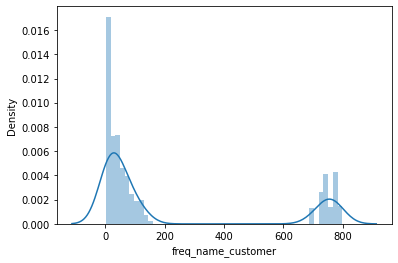

In [ ]:
sns.distplot(x_train['freq_name_customer'])

### Binned the name_customer frequency column
* Calculate the frequency distance across the frequency table.
* Create the bins based on the frequency distance.
* Create the labels based on the bins size and bin using pd.cut()
* Drop the original columns.

In [ ]:
######################################################  train  #######################################################

freqa = x_train['freq_name_customer'].count()/len(x_train['freq_name_customer'].unique())

binsa=list(range(x_train['freq_name_customer'].min()-1, x_train['freq_name_customer'].max()+int(freqa), int(freqa)))
labelsa=list(range(1,len(binsa)))

x_train['bin_freq_name_customer'] = pd.cut(x_train['freq_name_customer'], binsa,labels=labelsa)
x_train['bin_freq_name_customer'] = x_train['bin_freq_name_customer'].astype(int)
x_train.drop(['freq_name_customer', 'name_customer'], inplace=True, axis=1)


#######################################################  val  ########################################################

freqb = x_val['freq_name_customer'].count()/len(x_val['freq_name_customer'].unique())

binsb=list(range(x_val['freq_name_customer'].min()-1, x_val['freq_name_customer'].max()+int(freqb), int(freqb)))
labelsb=list(range(1,len(binsb)))

x_val['bin_freq_name_customer'] = pd.cut(x_val['freq_name_customer'], binsb,labels=labelsb)
x_val['bin_freq_name_customer'] = x_val['bin_freq_name_customer'].astype(int)
x_val.drop(['freq_name_customer', 'name_customer'], inplace=True, axis=1)


######################################################  test  ########################################################

freqc = x_test['freq_name_customer'].count()/len(x_test['freq_name_customer'].unique())

binsc=list(range(x_test['freq_name_customer'].min()-1, x_test['freq_name_customer'].max()+int(freqc), int(freqc)))
labelsc=list(range(1,len(binsc)))

x_test['bin_freq_name_customer'] = pd.cut(x_test['freq_name_customer'], binsc,labels=labelsc)
x_test['bin_freq_name_customer'] = x_test['bin_freq_name_customer'].astype(int)
x_test.drop(['freq_name_customer', 'name_customer'], inplace=True, axis=1)

x_train

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,bin_freq_name_customer
0,1,0200769623,2019-12-02,2019.0,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,NAH4,1.930170e+09,3
1,1,0200723794,2019-11-29,2019.0,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,NAA8,1.930152e+09,1
2,1,0200799367,2019-10-21,2019.0,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,NAA8,1.929943e+09,1
3,1,0200762301,2019-09-20,2019.0,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,NAC6,1.929828e+09,1
4,1,0200726979,2019-04-30,2019.0,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,NAA8,1.929139e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,1,0200739534,2019-09-27,2019.0,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,NAA8,1.929855e+09,1
34180,1,0200956366,2019-04-19,2019.0,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,NAA8,1.929071e+09,1
34181,0,0140105686,2019-09-12,2019.0,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,CA10,2.960575e+09,1
34182,1,0200769623,2019-11-18,2019.0,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,NAH4,1.930095e+09,3


In [ ]:
# len(x_train.cust_number.unique())
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34184 entries, 0 to 34183
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           34184 non-null  int64         
 1   cust_number             34184 non-null  object        
 2   clear_date              34184 non-null  datetime64[ns]
 3   buisness_year           34184 non-null  float64       
 4   posting_date            34184 non-null  datetime64[ns]
 5   document_create_date    34184 non-null  datetime64[ns]
 6   document_create_date.1  34184 non-null  datetime64[ns]
 7   due_in_date             34184 non-null  datetime64[ns]
 8   invoice_currency        34184 non-null  int64         
 9   total_open_amount       34184 non-null  float64       
 10  cust_payment_terms      34184 non-null  object        
 11  invoice_id              34184 non-null  float64       
 12  bin_freq_name_customer  34184 non-null  int64 

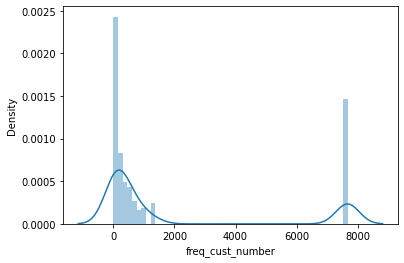

In [ ]:
x_train['freq_cust_number'] = x_train.cust_number.map(x_train.cust_number.value_counts().to_dict())
x_val['freq_cust_number'] = x_val.cust_number.map(x_val.cust_number.value_counts().to_dict())
x_test['freq_cust_number'] = x_test.cust_number.map(x_test.cust_number.value_counts().to_dict())
sns.distplot(x_train['freq_cust_number'])

In [ ]:
######################################################  train  ########################################################
freq2a = x_train['freq_cust_number'].count()/len(x_train['freq_cust_number'].unique())

bins2a=list(range(x_train['freq_cust_number'].min()-1, x_train['freq_cust_number'].max()+int(freq2a), int(freq2a)))
labels2a=list(range(1,len(bins2a)))

x_train['bin_freq_cust_number'] = pd.cut(x_train['freq_cust_number'], bins2a,labels=labels2a)
x_train['bin_freq_cust_number'] = x_train['bin_freq_cust_number'].astype(int)
x_train.drop(['freq_cust_number', 'cust_number'], inplace=True, axis=1)

######################################################  val  ########################################################

freq2b = x_val['freq_cust_number'].count()/len(x_val['freq_cust_number'].unique())

bins2b=list(range(x_val['freq_cust_number'].min()-1, x_val['freq_cust_number'].max()+int(freq2b), int(freq2b)))
labels2b=list(range(1,len(bins2b)))

x_val['bin_freq_cust_number'] = pd.cut(x_val['freq_cust_number'], bins2b,labels=labels2b)
x_val['bin_freq_cust_number'] = x_val['bin_freq_cust_number'].astype(int)
x_val.drop(['freq_cust_number', 'cust_number'], inplace=True, axis=1)

######################################################  test  ########################################################

freq2c = x_test['freq_cust_number'].count()/len(x_test['freq_cust_number'].unique())

bins2c=list(range(x_test['freq_cust_number'].min()-1, x_test['freq_cust_number'].max()+int(freq2c), int(freq2c)))
labels2c=list(range(1,len(bins2c)))

x_test['bin_freq_cust_number'] = pd.cut(x_test['freq_cust_number'], bins2c,labels=labels2c)
x_test['bin_freq_cust_number'] = x_test['bin_freq_cust_number'].astype(int)
x_test.drop(['freq_cust_number', 'cust_number'], inplace=True, axis=1)


x_train

,business_code,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,bin_freq_name_customer,bin_freq_cust_number
0,1,2019-12-02,2019.0,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,NAH4,1.930170e+09,3,30
1,1,2019-11-29,2019.0,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,NAA8,1.930152e+09,1,1
2,1,2019-10-21,2019.0,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,NAA8,1.929943e+09,1,2
3,1,2019-09-20,2019.0,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,NAC6,1.929828e+09,1,4
4,1,2019-04-30,2019.0,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,NAA8,1.929139e+09,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,1,2019-09-27,2019.0,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,NAA8,1.929855e+09,1,1
34180,1,2019-04-19,2019.0,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,NAA8,1.929071e+09,1,1
34181,0,2019-09-12,2019.0,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,CA10,2.960575e+09,1,1
34182,1,2019-11-18,2019.0,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,NAH4,1.930095e+09,3,30


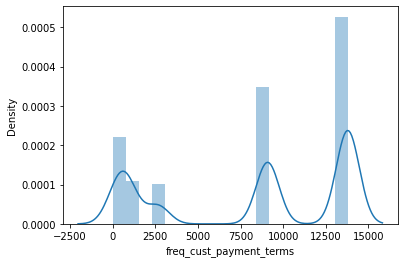

In [ ]:
x_train['freq_cust_payment_terms'] = x_train.cust_payment_terms.map(x_train.cust_payment_terms.value_counts().to_dict())
x_val['freq_cust_payment_terms'] = x_val.cust_payment_terms.map(x_val.cust_payment_terms.value_counts().to_dict())
x_test['freq_cust_payment_terms'] = x_test.cust_payment_terms.map(x_test.cust_payment_terms.value_counts().to_dict())
sns.distplot(x_train['freq_cust_payment_terms'])

In [ ]:
######################################################  train  #######################################################
freq3a = x_train['freq_cust_payment_terms'].count()/len(x_train['freq_cust_payment_terms'].unique())

bins3a=list(range(x_train['freq_cust_payment_terms'].min()-1, x_train['freq_cust_payment_terms'].max()+int(freq3a), int(freq3a)))
labels3a=list(range(1,len(bins3a)))

x_train['bin_freq_cust_payment_terms'] = pd.cut(x_train['freq_cust_payment_terms'], bins3a,labels=labels3a)
x_train['bin_freq_cust_payment_terms'] = x_train['bin_freq_cust_payment_terms'].astype(int)
x_train.drop(['freq_cust_payment_terms', 'cust_payment_terms'], inplace=True, axis=1)


######################################################   val  #######################################################
freq3b = x_val['freq_cust_payment_terms'].count()/len(x_val['freq_cust_payment_terms'].unique())

bins3b=list(range(x_val['freq_cust_payment_terms'].min()-1, x_val['freq_cust_payment_terms'].max()+int(freq3b), int(freq3b)))
labels3b=list(range(1,len(bins3b)))

x_val['bin_freq_cust_payment_terms'] = pd.cut(x_val['freq_cust_payment_terms'], bins3b,labels=labels3b)
x_val['bin_freq_cust_payment_terms'] = x_val['bin_freq_cust_payment_terms'].astype(int)
x_val.drop(['freq_cust_payment_terms', 'cust_payment_terms'], inplace=True, axis=1)


######################################################   test  #######################################################
freq3c = x_test['freq_cust_payment_terms'].count()/len(x_test['freq_cust_payment_terms'].unique())

bins3c=list(range(x_test['freq_cust_payment_terms'].min()-1, x_test['freq_cust_payment_terms'].max()+int(freq3c), int(freq3c)))
labels3c=list(range(1,len(bins3c)))

x_test['bin_freq_cust_payment_terms'] = pd.cut(x_test['freq_cust_payment_terms'], bins3c,labels=labels3c)
x_test['bin_freq_cust_payment_terms'] = x_test['bin_freq_cust_payment_terms'].astype(int)
x_test.drop(['freq_cust_payment_terms', 'cust_payment_terms'], inplace=True, axis=1)


x_train

,business_code,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,invoice_id,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms
0,1,2019-12-02,2019.0,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,1.930170e+09,3,30,12
1,1,2019-11-29,2019.0,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,1.930152e+09,1,1,19
2,1,2019-10-21,2019.0,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,1.929943e+09,1,2,19
3,1,2019-09-20,2019.0,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,1.929828e+09,1,4,2
4,1,2019-04-30,2019.0,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,1.929139e+09,1,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34179,1,2019-09-27,2019.0,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,1.929855e+09,1,1,19
34180,1,2019-04-19,2019.0,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,1.929071e+09,1,1,19
34181,0,2019-09-12,2019.0,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,2.960575e+09,1,1,4
34182,1,2019-11-18,2019.0,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,1.930095e+09,3,30,12


In [ ]:
x_train.buisness_year.value_counts()

2019.0    33988
2020.0      196
Name: buisness_year, dtype: int64

### We can actually drop the business_year column as it is a progressive column and will differ in val and test dataset

In [ ]:
x_train.drop('buisness_year', inplace=True, axis=1)
x_val.drop('buisness_year', inplace=True, axis=1)
x_test.drop('buisness_year', inplace=True, axis=1)

## Now we can normalise Open amount

* To normalise open_amount we can apply log transformation or binning
* Let's try log transformation first

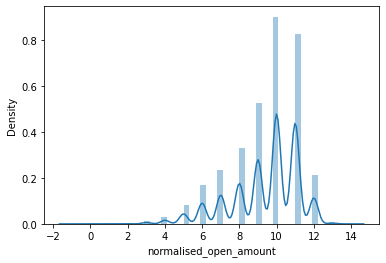

In [ ]:
x_train['normalised_open_amount'] = np.round(np.log(x_train.total_open_amount)).astype(int)
sns.distplot(x_train['normalised_open_amount'])

In [ ]:
x_train.merge(y_train,on = x_train.index).corr()

,key_0,business_code,invoice_currency,total_open_amount,invoice_id,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,normalised_open_amount,delay
key_0,1.000000,-0.002447,-0.004159,-0.000903,0.004112,0.009102,0.006167,-0.000864,0.004905,-0.000961
business_code,-0.002447,1.000000,0.530052,-0.119164,-0.507615,0.025141,0.022230,0.005130,-0.058084,-0.024734
invoice_currency,-0.004159,0.530052,1.000000,-0.184224,-0.999623,0.166581,0.168749,0.305822,-0.103319,0.133338
total_open_amount,-0.000903,-0.119164,-0.184224,1.000000,0.183599,-0.142811,-0.141967,0.056323,0.704288,-0.017318
invoice_id,0.004112,-0.507615,-0.999623,0.183599,1.000000,-0.168633,-0.170911,-0.310909,0.103388,-0.136248
bin_freq_name_customer,0.009102,0.025141,0.166581,-0.142811,-0.168633,1.000000,0.951823,0.038296,-0.065288,0.162059
bin_freq_cust_number,0.006167,0.022230,0.168749,-0.141967,-0.170911,0.951823,1.000000,0.029955,-0.077662,0.156755
bin_freq_cust_payment_terms,-0.000864,0.005130,0.305822,0.056323,-0.310909,0.038296,0.029955,1.000000,0.055023,0.050833
normalised_open_amount,0.004905,-0.058084,-0.103319,0.704288,0.103388,-0.065288,-0.077662,0.055023,1.000000,-0.010713
delay,-0.000961,-0.024734,0.133338,-0.017318,-0.136248,0.162059,0.156755,0.050833,-0.010713,1.000000


*  As we observe there is a very little correlation for normalised open amount
*  So we should aim for binning

In [ ]:
x_train.drop('normalised_open_amount', inplace=True, axis=1)

# Outlier Detection
* First find if it is a skewed or normalised distribution
* Then apply the formula for IQR and upper/ lower boundary calculation
* Remove the outiers depending upon these values

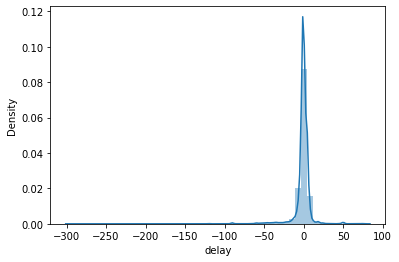

In [ ]:
sns.distplot(y_train)

Therefore it is a skewed plot

In [ ]:
y_train.min(), y_train.max()
# y_train.describe()
def calcIQR(t_column):
  lower_quantile = t_column.describe()[4]
  upper_quantile = t_column.describe()[6]
  IQR=upper_quantile - lower_quantile
  up_boundary = upper_quantile + (IQR * 3)
  low_boundary = lower_quantile - (IQR * 3)
  return up_boundary, low_boundary

In [ ]:
train_temp = x_train.merge(y_train,on = x_train.index)
val_temp = x_val.merge(y_val,on = x_val.index)
test_temp = x_test.merge(y_test,on = x_test.index)

In [ ]:
up_boundary, low_boundary = calcIQR(y_train)
train_temp.drop(train_temp[train_temp['delay']<low_boundary].index, inplace=True, axis=0)
train_temp.drop(train_temp[train_temp['delay']>up_boundary].index, inplace=True, axis=0)

up_boundary, low_boundary = calcIQR(y_val)
val_temp.drop(val_temp[val_temp['delay']<low_boundary].index, inplace=True, axis=0)
val_temp.drop(val_temp[val_temp['delay']>up_boundary].index, inplace=True, axis=0)

up_boundary, low_boundary = calcIQR(y_test)
test_temp.drop(test_temp[test_temp['delay']<low_boundary].index, inplace=True, axis=0)
test_temp.drop(test_temp[test_temp['delay']>up_boundary].index, inplace=True, axis=0)

In [ ]:
x_train = train_temp.drop('delay', axis=1)
y_train = train_temp['delay']

x_val = val_temp.drop('delay', axis=1)
y_val = val_temp['delay']

x_test = test_temp.drop('delay', axis=1)
y_test = test_temp['delay']

In [ ]:
x_train.reset_index(inplace=True)
x_train.drop(['key_0'], inplace=True, axis=1)
x_val.drop(['key_0'], inplace=True, axis=1)
x_test.drop(['key_0'], inplace=True, axis=1)
x_train

,index,business_code,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,invoice_id,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms
0,0,1,2019-12-02,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,1.930170e+09,3,30,12
1,1,1,2019-11-29,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,1.930152e+09,1,1,19
2,2,1,2019-10-21,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,1.929943e+09,1,2,19
3,3,1,2019-09-20,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,1.929828e+09,1,4,2
4,4,1,2019-04-30,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,1.929139e+09,1,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32625,34179,1,2019-09-27,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,1.929855e+09,1,1,19
32626,34180,1,2019-04-19,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,1.929071e+09,1,1,19
32627,34181,0,2019-09-12,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,2.960575e+09,1,1,4
32628,34182,1,2019-11-18,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,1.930095e+09,3,30,12


## Splitting all the date columns to day and month

In [ ]:
######################################################   train  #######################################################
x_train['posting_date_day'] = x_train.posting_date.dt.day.astype(int)
x_train['posting_date_month'] = x_train.posting_date.dt.month.astype(int)
x_train['clear_date_day'] = x_train.clear_date.dt.day.astype(int)
x_train['clear_date_month'] = x_train.clear_date.dt.month.astype(int)
x_train['document_create_date_day'] = x_train['document_create_date.1'].dt.day.astype(int)
x_train['document_create_date_month'] = x_train['document_create_date.1'].dt.month.astype(int)
x_train['due_in_date_day'] = x_train.due_in_date.dt.day.astype(int)
x_train['due_in_date_month'] = x_train.due_in_date.dt.month.astype(int)


######################################################   val   #######################################################
x_val['posting_date_day'] = x_val.posting_date.dt.day.astype(int)
x_val['posting_date_month'] = x_val.posting_date.dt.month.astype(int)
x_val['clear_date_day'] = x_val.clear_date.dt.day.astype(int)
x_val['clear_date_month'] = x_val.clear_date.dt.month.astype(int)
x_val['document_create_date_day'] = x_val['document_create_date.1'].dt.day.astype(int)
x_val['document_create_date_month'] = x_val['document_create_date.1'].dt.month.astype(int)
x_val['due_in_date_day'] = x_val.due_in_date.dt.day.astype(int)
x_val['due_in_date_month'] = x_val.due_in_date.dt.month.astype(int)


######################################################   test  #######################################################
x_test['posting_date_day'] = x_test.posting_date.dt.day.astype(int)
x_test['posting_date_month'] = x_test.posting_date.dt.month.astype(int)
x_test['clear_date_day'] = x_test.clear_date.dt.day.astype(int)
x_test['clear_date_month'] = x_test.clear_date.dt.month.astype(int)
x_test['document_create_date_day'] = x_test['document_create_date.1'].dt.day.astype(int)
x_test['document_create_date_month'] = x_test['document_create_date.1'].dt.month.astype(int)
x_test['due_in_date_day'] = x_test.due_in_date.dt.day.astype(int)
x_test['due_in_date_month'] = x_test.due_in_date.dt.month.astype(int)

x_train

,index,business_code,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,invoice_id,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,posting_date_day,posting_date_month,clear_date_day,clear_date_month,document_create_date_day,document_create_date_month,due_in_date_day,due_in_date_month
0,0,1,2019-12-02,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,1.930170e+09,3,30,12,21,11,2,12,21,11,6,12
1,1,1,2019-11-29,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,1.930152e+09,1,1,19,14,11,29,11,14,11,29,11
2,2,1,2019-10-21,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,1.929943e+09,1,2,19,4,10,21,10,4,10,19,10
3,3,1,2019-09-20,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,1.929828e+09,1,4,2,5,9,20,9,5,9,20,9
4,4,1,2019-04-30,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,1.929139e+09,1,5,19,15,4,30,4,15,4,30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32625,34179,1,2019-09-27,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,1.929855e+09,1,1,19,9,9,27,9,9,9,24,9
32626,34180,1,2019-04-19,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,1.929071e+09,1,1,19,6,4,19,4,6,4,21,4
32627,34181,0,2019-09-12,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,2.960575e+09,1,1,4,23,8,12,9,23,8,8,9
32628,34182,1,2019-11-18,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,1.930095e+09,3,30,12,3,11,18,11,3,11,18,11


In [ ]:
amount_month_dict = x_train.groupby('due_in_date_month')['total_open_amount'].mean().to_dict()
x_train['monthly_average_amount'] = x_train.due_in_date_month.map(amount_month_dict)
x_train['monthly_average_amount']=np.round(x_train.monthly_average_amount).astype(int)

In [ ]:
x_train.merge(y_train,on = x_train.index).corr()

,key_0,index,business_code,invoice_currency,total_open_amount,invoice_id,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,posting_date_day,posting_date_month,clear_date_day,clear_date_month,document_create_date_day,document_create_date_month,due_in_date_day,due_in_date_month,monthly_average_amount,delay
key_0,1.000000,1.000000,-0.009363,-0.003241,-0.001647,0.003009,0.009308,0.006630,-0.001222,0.005315,0.003059,-0.000401,0.003046,0.005315,0.003059,0.001195,0.001210,-0.005691,-0.004838
index,1.000000,1.000000,-0.009361,-0.003237,-0.001649,0.003005,0.009313,0.006634,-0.001222,0.005316,0.003056,-0.000403,0.003043,0.005316,0.003056,0.001197,0.001208,-0.005690,-0.004827
business_code,-0.009363,-0.009361,1.000000,0.574428,-0.127361,-0.555205,0.042591,0.040238,0.045782,0.002566,-0.012607,0.012009,0.002316,0.002566,-0.012607,0.010672,0.007752,0.009115,0.138017
invoice_currency,-0.003241,-0.003237,0.574428,1.000000,-0.183361,-0.999696,0.170173,0.171920,0.325799,-0.001511,-0.006865,-0.009244,-0.011626,-0.001511,-0.006865,0.013177,-0.005703,0.002410,0.279571
total_open_amount,-0.001647,-0.001649,-0.127361,-0.183361,1.000000,0.182786,-0.152693,-0.151522,0.043913,0.006343,0.025470,0.014231,0.023351,0.006343,0.025470,-0.004367,0.024462,0.038467,-0.103482
invoice_id,0.003009,0.003005,-0.555205,-0.999696,0.182786,1.000000,-0.171863,-0.173691,-0.330110,0.001731,0.008215,0.009877,0.013504,0.001731,0.008215,-0.012979,0.007588,-0.001251,-0.280356
bin_freq_name_customer,0.009308,0.009313,0.042591,0.170173,-0.152693,-0.171863,1.000000,0.951411,0.009393,0.002595,0.005075,-0.000760,-0.033142,0.002595,0.005075,0.001503,-0.023840,-0.009607,0.366830
bin_freq_cust_number,0.006630,0.006634,0.040238,0.171920,-0.151522,-0.173691,0.951411,1.000000,0.001740,0.010434,0.020890,-0.006554,-0.016398,0.010434,0.020890,-0.005373,-0.008308,-0.011381,0.348202
bin_freq_cust_payment_terms,-0.001222,-0.001222,0.045782,0.325799,0.043913,-0.330110,0.009393,0.001740,1.000000,-0.005667,0.011643,0.008807,-0.024992,-0.005667,0.011643,0.004644,-0.019470,-0.012353,-0.054934
posting_date_day,0.005315,0.005316,0.002566,-0.001511,0.006343,0.001731,0.002595,0.010434,-0.005667,1.000000,-0.045181,-0.366290,0.015362,1.000000,-0.045181,-0.408241,0.011654,0.025672,-0.002253


Average monthly amount has a higher correlation so it was a better choice than normalised total_open_amount

In [ ]:
amount_month_dict = x_val.groupby('due_in_date_month')['total_open_amount'].mean().to_dict()
x_val['monthly_average_amount'] = x_val.due_in_date_month.map(amount_month_dict)
x_val['monthly_average_amount']=np.round(x_val.monthly_average_amount).astype(int)

amount_month_dict = x_test.groupby('due_in_date_month')['total_open_amount'].mean().to_dict()
x_test['monthly_average_amount'] = x_test.due_in_date_month.map(amount_month_dict)
x_test['monthly_average_amount']=np.round(x_test.monthly_average_amount).astype(int)

In [ ]:
x_train

,index,business_code,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,invoice_id,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,posting_date_day,posting_date_month,clear_date_day,clear_date_month,document_create_date_day,document_create_date_month,due_in_date_day,due_in_date_month,monthly_average_amount
0,0,1,2019-12-02,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,1.930170e+09,3,30,12,21,11,2,12,21,11,6,12,34799
1,1,1,2019-11-29,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,1.930152e+09,1,1,19,14,11,29,11,14,11,29,11,33090
2,2,1,2019-10-21,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,1.929943e+09,1,2,19,4,10,21,10,4,10,19,10,32673
3,3,1,2019-09-20,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,1.929828e+09,1,4,2,5,9,20,9,5,9,20,9,30923
4,4,1,2019-04-30,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,1.929139e+09,1,5,19,15,4,30,4,15,4,30,4,31117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32625,34179,1,2019-09-27,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,1.929855e+09,1,1,19,9,9,27,9,9,9,24,9,30923
32626,34180,1,2019-04-19,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,1.929071e+09,1,1,19,6,4,19,4,6,4,21,4,31117
32627,34181,0,2019-09-12,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,2.960575e+09,1,1,4,23,8,12,9,23,8,8,9,30923
32628,34182,1,2019-11-18,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,1.930095e+09,3,30,12,3,11,18,11,3,11,18,11,33090


* Invoice_id is a unique id and hence won't affect the target column much so can be dropped

In [ ]:
x_train.drop(['invoice_id'], inplace=True, axis=1)
x_val.drop(['invoice_id'], inplace=True, axis=1)
x_test.drop(['invoice_id'], inplace=True, axis=1)

In [ ]:
x_train

,index,business_code,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,posting_date_day,posting_date_month,clear_date_day,clear_date_month,document_create_date_day,document_create_date_month,due_in_date_day,due_in_date_month,monthly_average_amount
0,0,1,2019-12-02,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,3,30,12,21,11,2,12,21,11,6,12,34799
1,1,1,2019-11-29,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,1,1,19,14,11,29,11,14,11,29,11,33090
2,2,1,2019-10-21,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,1,2,19,4,10,21,10,4,10,19,10,32673
3,3,1,2019-09-20,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,1,4,2,5,9,20,9,5,9,20,9,30923
4,4,1,2019-04-30,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,1,5,19,15,4,30,4,15,4,30,4,31117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32625,34179,1,2019-09-27,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,1,1,19,9,9,27,9,9,9,24,9,30923
32626,34180,1,2019-04-19,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,1,1,19,6,4,19,4,6,4,21,4,31117
32627,34181,0,2019-09-12,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,1,1,4,23,8,12,9,23,8,8,9,30923
32628,34182,1,2019-11-18,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,3,30,12,3,11,18,11,3,11,18,11,33090


### We can create an additional feature column for the difference in document_create_date and due_in_date

In [ ]:
x_train['invoice_delay'] = x_train.due_in_date - x_train['document_create_date.1']
x_train['invoice_delay'] = x_train['invoice_delay'].dt.days.astype(int)

x_val['invoice_delay'] = x_val.due_in_date - x_val['document_create_date.1']
x_val['invoice_delay'] = x_val['invoice_delay'].dt.days.astype(int)

x_test['invoice_delay'] = x_test.due_in_date - x_test['document_create_date.1']
x_test['invoice_delay'] = x_test['invoice_delay'].dt.days.astype(int)
x_train

,index,business_code,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,posting_date_day,posting_date_month,clear_date_day,clear_date_month,document_create_date_day,document_create_date_month,due_in_date_day,due_in_date_month,monthly_average_amount,invoice_delay
0,0,1,2019-12-02,2019-11-21,2019-11-19,2019-11-21,2019-12-06,1,29891.83,3,30,12,21,11,2,12,21,11,6,12,34799,15
1,1,1,2019-11-29,2019-11-14,2019-11-13,2019-11-14,2019-11-29,1,155913.13,1,1,19,14,11,29,11,14,11,29,11,33090,15
2,2,1,2019-10-21,2019-10-04,2019-09-30,2019-10-04,2019-10-19,1,5193.20,1,2,19,4,10,21,10,4,10,19,10,32673,15
3,3,1,2019-09-20,2019-09-05,2019-09-04,2019-09-05,2019-09-20,1,2465.59,1,4,2,5,9,20,9,5,9,20,9,30923,15
4,4,1,2019-04-30,2019-04-15,2019-04-12,2019-04-15,2019-04-30,1,62359.91,1,5,19,15,4,30,4,15,4,30,4,31117,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32625,34179,1,2019-09-27,2019-09-09,2019-09-10,2019-09-09,2019-09-24,1,1846.24,1,1,19,9,9,27,9,9,9,24,9,30923,15
32626,34180,1,2019-04-19,2019-04-06,2019-04-02,2019-04-06,2019-04-21,1,54806.40,1,1,19,6,4,19,4,6,4,21,4,31117,15
32627,34181,0,2019-09-12,2019-08-23,2019-08-23,2019-08-23,2019-09-08,0,1953.00,1,1,4,23,8,12,9,23,8,8,9,30923,16
32628,34182,1,2019-11-18,2019-11-03,2019-11-02,2019-11-03,2019-11-18,1,3853.70,3,30,12,3,11,18,11,3,11,18,11,33090,15


In [ ]:
x_train.merge(y_train,on = x_train.index).corr()

,key_0,index,business_code,invoice_currency,total_open_amount,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,posting_date_day,posting_date_month,clear_date_day,clear_date_month,document_create_date_day,document_create_date_month,due_in_date_day,due_in_date_month,monthly_average_amount,invoice_delay,delay
key_0,1.000000,1.000000,-0.009363,-0.003241,-0.001647,0.009308,0.006630,-0.001222,0.005315,0.003059,-0.000401,0.003046,0.005315,0.003059,0.001195,0.001210,-0.005691,0.007806,-0.004838
index,1.000000,1.000000,-0.009361,-0.003237,-0.001649,0.009313,0.006634,-0.001222,0.005316,0.003056,-0.000403,0.003043,0.005316,0.003056,0.001197,0.001208,-0.005690,0.007807,-0.004827
business_code,-0.009363,-0.009361,1.000000,0.574428,-0.127361,0.042591,0.040238,0.045782,0.002566,-0.012607,0.012009,0.002316,0.002566,-0.012607,0.010672,0.007752,0.009115,0.241895,0.138017
invoice_currency,-0.003241,-0.003237,0.574428,1.000000,-0.183361,0.170173,0.171920,0.325799,-0.001511,-0.006865,-0.009244,-0.011626,-0.001511,-0.006865,0.013177,-0.005703,0.002410,0.104485,0.279571
total_open_amount,-0.001647,-0.001649,-0.127361,-0.183361,1.000000,-0.152693,-0.151522,0.043913,0.006343,0.025470,0.014231,0.023351,0.006343,0.025470,-0.004367,0.024462,0.038467,-0.075110,-0.103482
bin_freq_name_customer,0.009308,0.009313,0.042591,0.170173,-0.152693,1.000000,0.951411,0.009393,0.002595,0.005075,-0.000760,-0.033142,0.002595,0.005075,0.001503,-0.023840,-0.009607,-0.120564,0.366830
bin_freq_cust_number,0.006630,0.006634,0.040238,0.171920,-0.151522,0.951411,1.000000,0.001740,0.010434,0.020890,-0.006554,-0.016398,0.010434,0.020890,-0.005373,-0.008308,-0.011381,-0.116511,0.348202
bin_freq_cust_payment_terms,-0.001222,-0.001222,0.045782,0.325799,0.043913,0.009393,0.001740,1.000000,-0.005667,0.011643,0.008807,-0.024992,-0.005667,0.011643,0.004644,-0.019470,-0.012353,-0.323293,-0.054934
posting_date_day,0.005315,0.005316,0.002566,-0.001511,0.006343,0.002595,0.010434,-0.005667,1.000000,-0.045181,-0.366290,0.015362,1.000000,-0.045181,-0.408241,0.011654,0.025672,0.010257,-0.002253
posting_date_month,0.003059,0.003056,-0.012607,-0.006865,0.025470,0.005075,0.020890,0.011643,-0.045181,1.000000,0.074806,0.926964,-0.045181,1.000000,0.067081,0.897944,0.552367,-0.042661,0.025848


## Now we can drop the date columns as part of feature selection, as we have extracted relevant features onto other columns

In [ ]:
x_train.drop(['posting_date', 'clear_date', 'document_create_date.1', 'document_create_date', 'due_in_date', 'total_open_amount'], inplace=True, axis=1)
x_val.drop(['posting_date', 'clear_date', 'document_create_date.1', 'document_create_date', 'due_in_date', 'total_open_amount'], inplace=True, axis=1)
x_test.drop(['posting_date', 'clear_date', 'document_create_date.1', 'document_create_date', 'due_in_date', 'total_open_amount'], inplace=True, axis=1)

In [ ]:
x_train

,index,business_code,invoice_currency,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,posting_date_day,posting_date_month,clear_date_day,clear_date_month,document_create_date_day,document_create_date_month,due_in_date_day,due_in_date_month,monthly_average_amount,invoice_delay
0,0,1,1,3,30,12,21,11,2,12,21,11,6,12,34799,15
1,1,1,1,1,1,19,14,11,29,11,14,11,29,11,33090,15
2,2,1,1,1,2,19,4,10,21,10,4,10,19,10,32673,15
3,3,1,1,1,4,2,5,9,20,9,5,9,20,9,30923,15
4,4,1,1,1,5,19,15,4,30,4,15,4,30,4,31117,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32625,34179,1,1,1,1,19,9,9,27,9,9,9,24,9,30923,15
32626,34180,1,1,1,1,19,6,4,19,4,6,4,21,4,31117,15
32627,34181,0,0,1,1,4,23,8,12,9,23,8,8,9,30923,16
32628,34182,1,1,3,30,12,3,11,18,11,3,11,18,11,33090,15


In [ ]:
x_test

,business_code,invoice_currency,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,posting_date_day,posting_date_month,clear_date_day,clear_date_month,document_create_date_day,document_create_date_month,due_in_date_day,due_in_date_month,monthly_average_amount,invoice_delay
0,1,1,1,1,8,19,2,5,3,19,2,5,3,31447,15
1,1,1,1,1,8,26,2,12,3,26,2,12,3,31447,15
2,1,1,1,1,1,18,2,5,3,18,2,4,3,31447,15
3,1,1,1,1,8,18,2,4,3,18,2,4,3,31447,15
4,1,1,1,1,8,3,2,6,3,3,2,18,2,33349,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,1,1,1,1,8,31,1,11,2,31,1,15,2,33349,15
2468,1,1,1,1,1,8,2,18,3,8,2,11,3,31447,32
2469,1,1,1,1,8,3,2,18,2,3,2,18,2,33349,15
2470,1,1,1,9,6,5,2,18,2,5,2,20,2,33349,15


### We can drop posting date columns as it is completely correlated to document_date columns

In [ ]:
x_train.drop(['posting_date_day', 'posting_date_month'], inplace=True, axis=1)
x_val.drop(['posting_date_day', 'posting_date_month'], inplace=True, axis=1)
x_test.drop(['posting_date_day', 'posting_date_month'], inplace=True, axis=1)

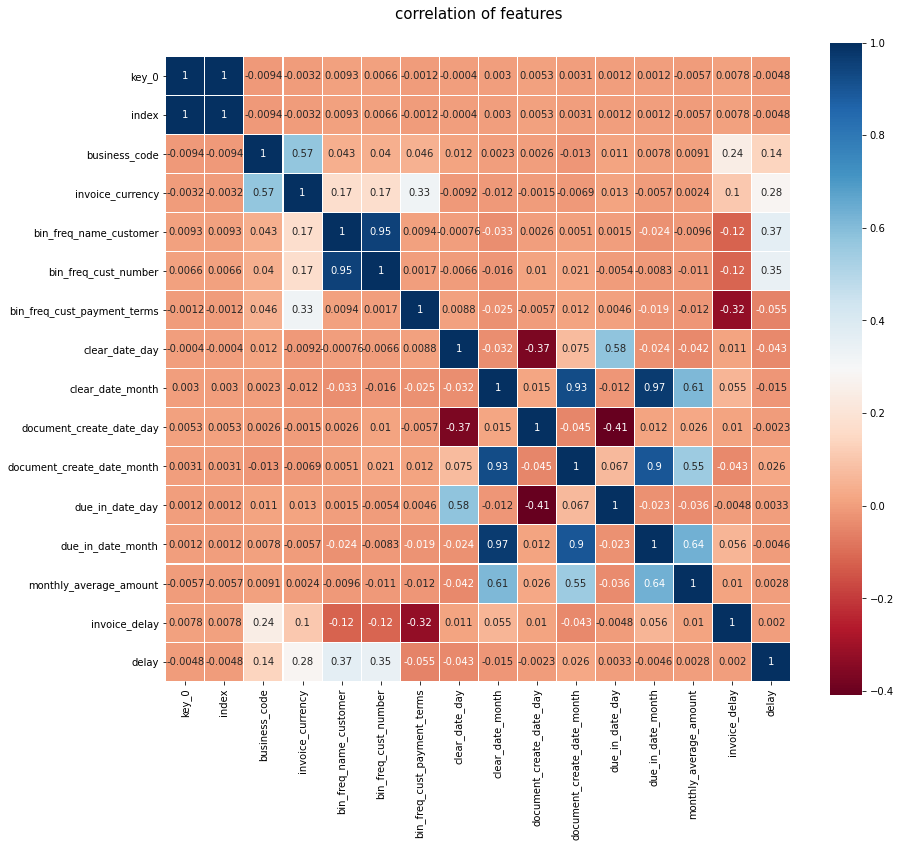

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('correlation of features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### According to heatmap we can drop document_create_day and due_in_date_day

In [ ]:
x_train.drop(['document_create_date_day', 'due_in_date_day', 'clear_date_day'], inplace=True, axis=1)
x_val.drop(['document_create_date_day', 'due_in_date_day', 'clear_date_day'], inplace=True, axis=1)
x_test.drop(['document_create_date_day', 'due_in_date_day', 'clear_date_day'], inplace=True, axis=1)

In [ ]:
x_train.drop('index', inplace=True, axis=1)
x_train.drop('clear_date_month', inplace=True, axis=1)
x_val.drop('clear_date_month', inplace=True, axis=1)
x_test.drop('clear_date_month', inplace=True, axis=1)

x_train

,business_code,invoice_currency,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,document_create_date_month,due_in_date_month,monthly_average_amount,invoice_delay
0,1,1,3,30,12,11,12,34799,15
1,1,1,1,1,19,11,11,33090,15
2,1,1,1,2,19,10,10,32673,15
3,1,1,1,4,2,9,9,30923,15
4,1,1,1,5,19,4,4,31117,15
...,...,...,...,...,...,...,...,...,...
32625,1,1,1,1,19,9,9,30923,15
32626,1,1,1,1,19,4,4,31117,15
32627,0,0,1,1,4,8,9,30923,16
32628,1,1,3,30,12,11,11,33090,15


In [ ]:
y_test

0        0
1        0
2       -1
3        0
4      -17
        ..
2467     4
2468    -7
2469     0
2470     2
2471    -2
Name: delay, Length: 2325, dtype: int64

#  Modeling
*  Linear Regression
*  Kneighbours Regression
*  Logistic Regression

`Won't try  classification based algos as our problem statement is Regression based`

In [ ]:
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = base_model.predict(x_val)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_val, y_predict, squared=False))

2.0343733771893864

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=10)

In [ ]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:

y_predict2 = regressor.predict(x_val)

### MSE

In [ ]:
mean_squared_error(y_val, y_predict2, squared=False)

4.877502455335255

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)

In [ ]:
neigh.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
y_predict3 = neigh.predict(x_val)
mean_squared_error(y_val, y_predict3, squared=False)

4.532286160423348

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegressor = LogisticRegression(random_state = 0,solver = 'liblinear')

In [ ]:
logisticRegressor.fit(x_train, y_train)
y_predict4 = logisticRegressor.predict(x_val)

In [ ]:
np.sqrt(mean_squared_error(y_val, y_predict4, squared=False))

2.0648395027683524

## Therefore we go ahead with the Linear Regressor

### Final RMSE

In [ ]:
y_predict = base_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_predict, squared=False))

1.9499270724169282

In [ ]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])
met

,Predicted,Actuals
0,-0.001039,0
1,-0.001039,0
2,0.663887,-1
3,-0.001039,0
4,0.163366,-17
...,...,...
2320,0.011345,4
2321,0.465296,-7
2322,0.163366,0
2323,0.196422,2


In [ ]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

# Now let's predict for main_test data
* We need to convert main_test in the form of x_train
* Predict the values for main_test
* Map the values back to main_test

###  Preprocessing

In [ ]:
date_cols = ['clear_date', 'posting_date', 'document_create_date', 'document_create_date.1', 'due_in_date']
main_test['due_in_date'] = main_test['due_in_date'].astype(int)
for datcol in date_cols:
  main_test[datcol] = pd.to_datetime(main_test[datcol].astype(str))

In [ ]:
f_main_test = main_test.copy()
f_main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200078795,H T H us,NaT,2020.0,1.930612e+09,2020-03-06,2020-03-06,2020-03-06,2020-03-21,USD,RV,8831.49,20200306.0,NAA8,1.930612e+09
1,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930683e+09,2020-03-22,2020-03-21,2020-03-22,2020-04-06,USD,RV,661.11,20200322.0,NAH4,1.930683e+09
2,U001,0200092114,MRS GE trust,NaT,2020.0,1.930662e+09,2020-03-17,2020-03-17,2020-03-17,2020-03-27,USD,RV,55515.60,20200317.0,NA10,1.930662e+09
3,CA02,0140104440,SO corp,NaT,2020.0,2.960630e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-03,CAD,RV,287220.92,20200423.0,CA10,2.960630e+09
4,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930803e+09,2020-04-20,2020-04-20,2020-04-20,2020-05-05,USD,RV,471.56,20200420.0,NAH4,1.930803e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930655e+09,2020-03-17,2020-03-16,2020-03-17,2020-04-01,USD,RV,6640.59,20200317.0,NAH4,1.930655e+09
9698,U001,0200790107,ROU,NaT,2020.0,1.930788e+09,2020-04-14,2020-04-14,2020-04-14,2020-04-29,USD,RV,53820.24,20200414.0,NAC6,1.930788e+09
9699,U001,0100049617,SUNRIS corporation,NaT,2020.0,1.930679e+09,2020-03-20,2020-03-20,2020-03-20,2020-04-09,USD,RV,35373.21,20200320.0,NAD1,1.930679e+09
9700,U001,0200769623,WAL-MAR,NaT,2020.0,1.930783e+09,2020-04-16,2020-04-14,2020-04-16,2020-05-01,USD,RV,12869.58,20200416.0,NAH4,1.930783e+09


In [ ]:
main_test.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9702
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
dtype: int64

# Feature Engineering and Encoding

In [ ]:
main_test.dropna(how='all', axis=0, inplace=True)

main_test.drop(['clear_date','baseline_create_date', 'document type', 'doc_id', 'buisness_year', 'invoice_id'], inplace=True, axis=1)

In [ ]:
main_test['invoice_currency'] = np.where(main_test.invoice_currency == 'USD', 1, 0)
Businesscode_encoder.fit(main_test['business_code'])
main_test['business_code'] = Businesscode_encoder.transform(main_test['business_code'])

In [ ]:
main_test['freq_name_customer'] = main_test.name_customer.map(main_test.name_customer.value_counts().to_dict())

freqa = main_test['freq_name_customer'].count()/len(main_test['freq_name_customer'].unique())

binsa=list(range(main_test['freq_name_customer'].min()-1, main_test['freq_name_customer'].max()+int(freqa), int(freqa)))
labelsa=list(range(1,len(binsa)))

main_test['bin_freq_name_customer'] = pd.cut(main_test['freq_name_customer'], binsa,labels=labelsa)
main_test['bin_freq_name_customer'] = main_test['bin_freq_name_customer'].astype(int)
main_test.drop(['freq_name_customer', 'name_customer'], inplace=True, axis=1)

In [ ]:
main_test['freq_cust_number'] = main_test.cust_number.map(main_test.cust_number.value_counts().to_dict())

freq2a = main_test['freq_cust_number'].count()/len(main_test['freq_cust_number'].unique())

bins2a=list(range(main_test['freq_cust_number'].min()-1, main_test['freq_cust_number'].max()+int(freq2a), int(freq2a)))
labels2a=list(range(1,len(bins2a)))

main_test['bin_freq_cust_number'] = pd.cut(main_test['freq_cust_number'], bins2a,labels=labels2a)
main_test['bin_freq_cust_number'] = main_test['bin_freq_cust_number'].astype(int)
main_test.drop(['freq_cust_number', 'cust_number'], inplace=True, axis=1)

In [ ]:
main_test['freq_cust_payment_terms'] = main_test.cust_payment_terms.map(main_test.cust_payment_terms.value_counts().to_dict())

freq3a = main_test['freq_cust_payment_terms'].count()/len(main_test['freq_cust_payment_terms'].unique())

bins3a=list(range(main_test['freq_cust_payment_terms'].min()-1, main_test['freq_cust_payment_terms'].max()+int(freq3a), int(freq3a)))
labels3a=list(range(1,len(bins3a)))

main_test['bin_freq_cust_payment_terms'] = pd.cut(main_test['freq_cust_payment_terms'], bins3a,labels=labels3a)
main_test['bin_freq_cust_payment_terms'] = main_test['bin_freq_cust_payment_terms'].astype(int)
main_test.drop(['freq_cust_payment_terms', 'cust_payment_terms'], inplace=True, axis=1)

In [ ]:
main_test['posting_date_day'] = main_test.posting_date.dt.day.astype(int)
main_test['posting_date_month'] = main_test.posting_date.dt.month.astype(int)
main_test['document_create_date_day'] = main_test['document_create_date.1'].dt.day.astype(int)
main_test['document_create_date_month'] = main_test['document_create_date.1'].dt.month.astype(int)
main_test['due_in_date_day'] = main_test.due_in_date.dt.day.astype(int)
main_test['due_in_date_month'] = main_test.due_in_date.dt.month.astype(int)

In [ ]:
amount_month_dict = main_test.groupby('due_in_date_month')['total_open_amount'].mean().to_dict()
main_test['monthly_average_amount'] = main_test.due_in_date_month.map(amount_month_dict)
main_test['monthly_average_amount']=np.round(main_test.monthly_average_amount).astype(int)

In [ ]:
main_test['invoice_delay'] = main_test.due_in_date - main_test['document_create_date.1']
main_test['invoice_delay'] = main_test['invoice_delay'].dt.days.astype(int)

In [ ]:
main_test.drop(['posting_date', 'document_create_date.1', 'document_create_date', 'due_in_date', 'total_open_amount', 'posting_date_day', 'posting_date_month','document_create_date_day', 'due_in_date_day'], inplace=True, axis=1)

In [ ]:
main_test.reset_index(inplace=True, drop=True)
main_test

,business_code,invoice_currency,bin_freq_name_customer,bin_freq_cust_number,bin_freq_cust_payment_terms,document_create_date_month,due_in_date_month,monthly_average_amount,invoice_delay
0,1,1,1,1,11,3,3,32200,15
1,1,1,2,18,9,3,4,34602,15
2,1,1,1,1,1,3,3,32200,10
3,0,0,1,1,2,4,5,30578,12
4,1,1,2,18,9,4,5,30578,15
...,...,...,...,...,...,...,...,...,...
9697,1,1,2,18,9,3,4,34602,15
9698,1,1,1,1,2,4,4,34602,15
9699,1,1,1,1,1,3,4,34602,20
9700,1,1,2,18,9,4,5,30578,15


# Prediction

In [ ]:
y_main_predict = base_model.predict(main_test)
y_main_predict = pd.Series(y_main_predict,name='Delay')
y_main_predict

0      -0.122922
1       1.340568
2       0.885380
3      -3.655179
4       1.297008
          ...   
9697    1.340568
9698    0.782832
9699    0.667391
9700    1.297008
9701    1.297008
Name: Delay, Length: 9702, dtype: float64

# Mapping Prediction

In [ ]:
y_main_predict = np.round(y_main_predict).astype(int)
predicted_inoice_final_f_finalest = f_main_test.merge(y_main_predict , on = main_test.index )
predicted_inoice_final_f_finalest['predicted_payment_date'] = predicted_inoice_final_f_finalest['due_in_date'] + pd.to_timedelta(predicted_inoice_final_f_finalest['Delay'], unit='d')
predicted_inoice_final_f_finalest

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay,predicted_payment_date
0,0,U001,0200078795,H T H us,NaT,2020.0,1.930612e+09,2020-03-06,2020-03-06,2020-03-06,2020-03-21,USD,RV,8831.49,20200306.0,NAA8,1.930612e+09,0,2020-03-21
1,1,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930683e+09,2020-03-22,2020-03-21,2020-03-22,2020-04-06,USD,RV,661.11,20200322.0,NAH4,1.930683e+09,1,2020-04-07
2,2,U001,0200092114,MRS GE trust,NaT,2020.0,1.930662e+09,2020-03-17,2020-03-17,2020-03-17,2020-03-27,USD,RV,55515.60,20200317.0,NA10,1.930662e+09,1,2020-03-28
3,3,CA02,0140104440,SO corp,NaT,2020.0,2.960630e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-03,CAD,RV,287220.92,20200423.0,CA10,2.960630e+09,-4,2020-04-29
4,4,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930803e+09,2020-04-20,2020-04-20,2020-04-20,2020-05-05,USD,RV,471.56,20200420.0,NAH4,1.930803e+09,1,2020-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,9697,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930655e+09,2020-03-17,2020-03-16,2020-03-17,2020-04-01,USD,RV,6640.59,20200317.0,NAH4,1.930655e+09,1,2020-04-02
9698,9698,U001,0200790107,ROU,NaT,2020.0,1.930788e+09,2020-04-14,2020-04-14,2020-04-14,2020-04-29,USD,RV,53820.24,20200414.0,NAC6,1.930788e+09,1,2020-04-30
9699,9699,U001,0100049617,SUNRIS corporation,NaT,2020.0,1.930679e+09,2020-03-20,2020-03-20,2020-03-20,2020-04-09,USD,RV,35373.21,20200320.0,NAD1,1.930679e+09,1,2020-04-10
9700,9700,U001,0200769623,WAL-MAR,NaT,2020.0,1.930783e+09,2020-04-16,2020-04-14,2020-04-16,2020-05-01,USD,RV,12869.58,20200416.0,NAH4,1.930783e+09,1,2020-05-02


# Bucketing Delay column

In [ ]:
# bins=[-6, -4, -2, 0, 2, 4, 6]
# labels=['v -ve', '-ve', 'l -ve', 'l +ve', '+ve', 'v +ve']
def normalise_row(row):
  if row['Delay']>0:
    return '+ve'
  elif row['Delay']>0:
    return '-ve'
  else:
    return 'null'
predicted_inoice_final_f_finalest['bucketed_delay'] = predicted_inoice_final_f_finalest.apply(lambda row : normalise_row(row), axis=1)
predicted_inoice_final_f_finalest.to_csv('/content/drive/MyDrive/highRadData/milestone_final.csv')
predicted_inoice_final_f_finalest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9702 entries, 0 to 9701
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   key_0                   9702 non-null   int64         
 1   business_code           9702 non-null   object        
 2   cust_number             9702 non-null   object        
 3   name_customer           9702 non-null   object        
 4   clear_date              0 non-null      datetime64[ns]
 5   buisness_year           9702 non-null   float64       
 6   doc_id                  9702 non-null   float64       
 7   posting_date            9702 non-null   datetime64[ns]
 8   document_create_date    9702 non-null   datetime64[ns]
 9   document_create_date.1  9702 non-null   datetime64[ns]
 10  due_in_date             9702 non-null   datetime64[ns]
 11  invoice_currency        9702 non-null   object        
 12  document type           9702 non-null   object  